# Notebook to analyse integrated xenopus scRNA-seq datasets

## Imports

In [36]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import matplotlib
import pickle
%matplotlib inline
import palantir
import harmony 
import random
np.random.seed(0)
random.seed(0)

In [2]:
from IntegratedAnalysis import plot_gene_expression

## Settings

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
sc.settings.verbosity = 0  

# Load data

In [6]:

def save_intermediate_files(datasets, temp_dir, file_name_template, identifier):
    for d in datasets:
        file = os.path.join('.', temp_dir, file_name_template + '_' + d.obs[identifier][0] + '.h5ad')
        d.write(file, compression='gzip')
        
identifiers = ['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27']
      
def load_intermediate_files(temp_dir, file_name_template, identifiers):
    ob_list = []
    for i in identifiers:
        file = os.path.join('.', temp_dir, file_name_template + '_' + i+ '.h5ad')
        ob_list.append(sc.read_h5ad(file))
    return ob_list

### Harmony discrete timeseries alignment

In [8]:
from Integrate import concat_for_harmony, adata_to_df

In [9]:
timepoints = ['st08', 'st10.5', 'st12', 'st13', 'st16', 'st18', 'st20', 'st22', 'st24', 'st27']
adatas = load_intermediate_files( 'intermediate_files', 'zUMI_raw_singlets' , timepoints)
counts = concat_for_harmony(adatas, timepoints)
norm_df = harmony.utils.normalize_counts(counts)
hvg_genes = harmony.utils.hvg_genes(norm_df, no_genes=2000)
data_df = harmony.utils.log_transform(norm_df.loc[:,hvg_genes])




st08
st10.5
st12
st13
st16
st18
st20
st22
st24
st27
Concatenating data..


In [10]:
#Make cluster colorsfor integrated dataset
colors = [
[(0.3388235294117647, 0.7117262591311034, 0.40584390618992694),0, 2],
[(0.7371472510572856, 0.895517108804306, 0.7108342945021145),1, 4],
[(0.5573241061130334, 0.8164244521337947, 0.546958861976163),2, 3],
[(0.7364705882352941, 0.08, 0.10117647058823528),3, 9],
[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),4, 1],
[(0.8828143021914648, 0.9546943483275664, 0.8621914648212226),5, 5],
[(0.9466666666666667, 0.26823529411764707, 0.19607843137254902),6, 8],
[(0.586082276047674, 0.586082276047674, 0.586082276047674),7, 0],
[(0.996078431372549, 0.8091503267973856, 0.39607843137254906),8, 14],
[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897),9, 10],
[(0.41708573625528644, 0.6806305267204922, 0.8382314494425221),10, 11],
[(0.5513264129181085, 0.537916186082276, 0.7524490580545944),11, 13],
[(0.9874509803921568, 0.5411764705882353, 0.41568627450980394),12, 7],
[(0.1271049596309112, 0.4401845444059977, 0.7074971164936563),13, 12],
[(0.9913725490196079, 0.7913725490196079, 0.7082352941176471),14, 6]]
colors = pd.DataFrame(colors, columns = ['color', 'org_clust', 'clust_order'])

In [11]:


sns.palplot(colors.sort_values('clust_order').color)

In [12]:
spring = pd.read_csv('SPRING_integrated_coordinates.txt', header = None, index_col = 0)
spring.columns = ['x', 'y']
spring.index = counts.index

In [13]:

tp = pd.Series(index=data_df.index)
for t in timepoints:
    cells = data_df.index[data_df.index.str.contains(t)]
    tp[cells] = t

In [14]:
#Search by gene id
def find(gene):
    return list(imp_df.columns[imp_df.columns.str.match(r'^(gene[0-9]+\|){}\.[S|L]'.format(gene))])

## Cell type marker genes

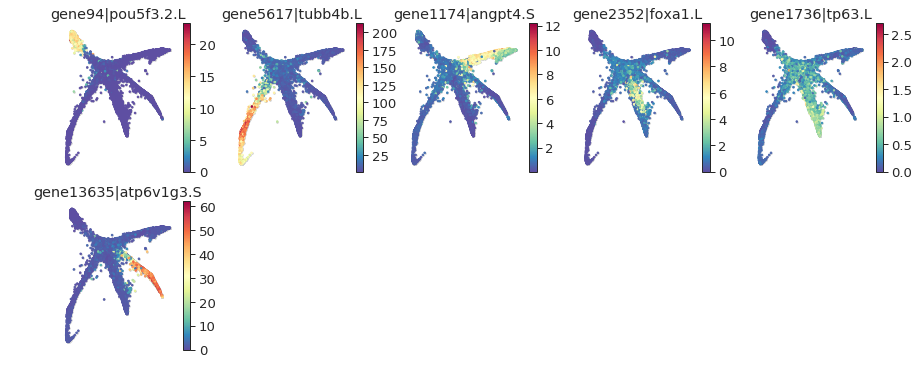

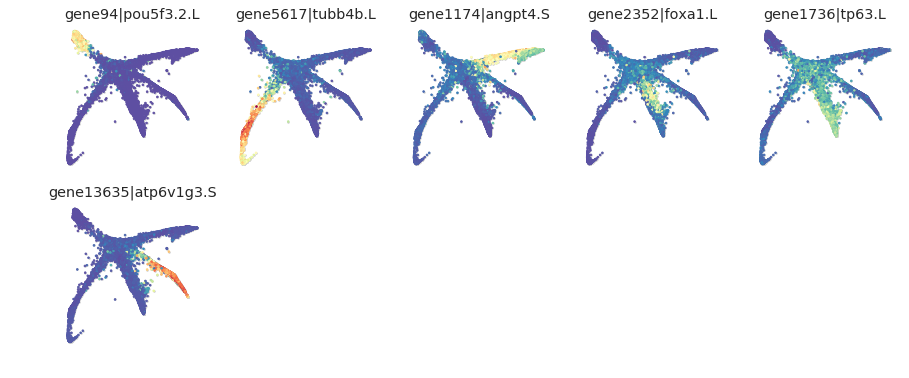

In [117]:
#Plot known markers of cell types
plot_gene_expression(imp_df, spring, 
                                        ['gene94|pou5f3.2.L', 'gene5617|tubb4b.L','gene1174|angpt4.S', 'gene2352|foxa1.L','gene1736|tp63.L', 'gene13635|atp6v1g3.S' ],
                                       plot_scale=True)
plt.savefig('./intermediate_files/Figures/marker_genes_colorbars.pdf',dpi = 500 )
plot_gene_expression(imp_df, spring, 
                                        ['gene94|pou5f3.2.L', 'gene5617|tubb4b.L','gene1174|angpt4.S', 'gene2352|foxa1.L', 'gene1736|tp63.L', 'gene13635|atp6v1g3.S' ],
                                       plot_scale=False)
plt.savefig('./intermediate_files/Figures/marker_genes.pdf',dpi = 500 )

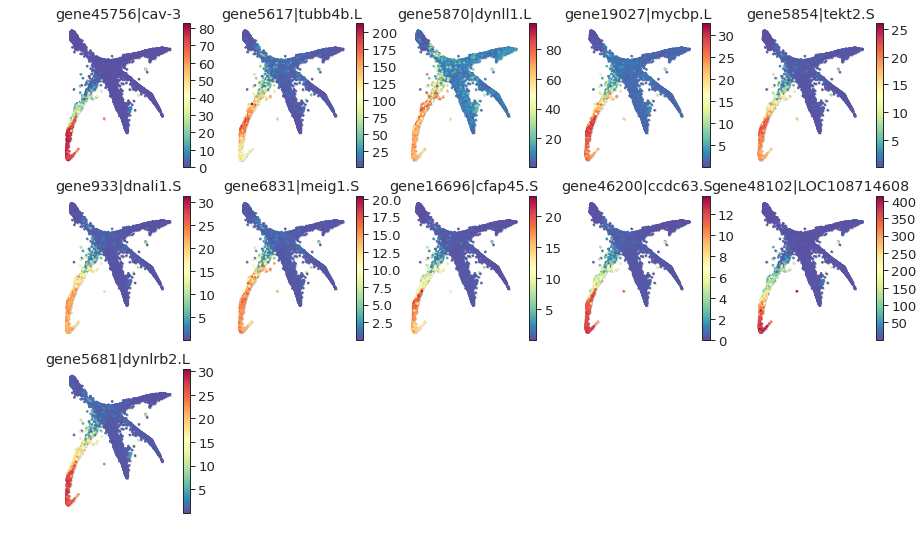

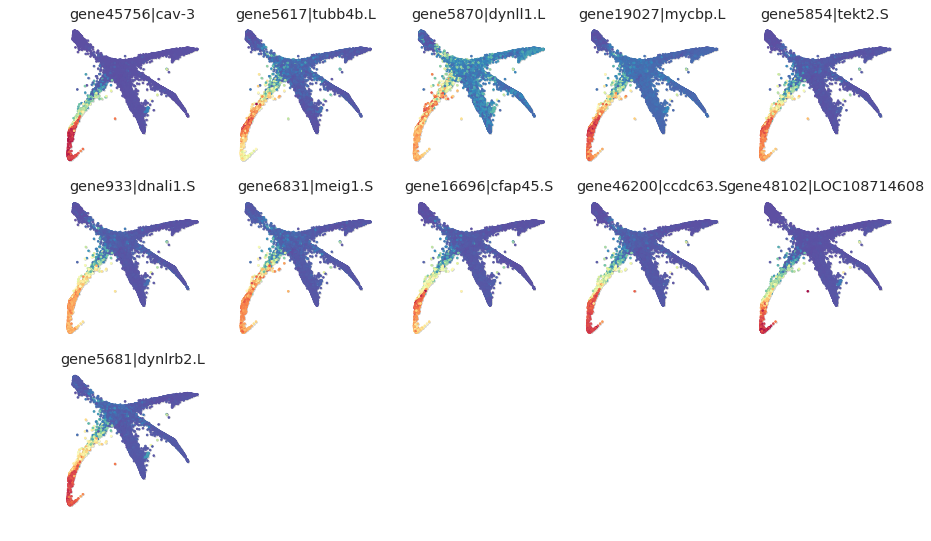

In [121]:
#Plot MCC markers
plot_gene_expression(imp_df, spring, ['gene45756|cav-3', 'gene5617|tubb4b.L','gene5870|dynll1.L', 'gene19027|mycbp.L', 'gene5854|tekt2.S', 'gene933|dnali1.S', 'gene6831|meig1.S', 
                                                    'gene16696|cfap45.S', 'gene46200|ccdc63.S', 'gene48102|LOC108714608', 'gene5681|dynlrb2.L'], plot_scale=True)
plt.savefig('./intermediate_files/Figures/marker_genes_MCC_Scale.pdf'.format(g),dpi = 500 )
plot_gene_expression(imp_df, spring, ['gene45756|cav-3', 'gene5617|tubb4b.L','gene5870|dynll1.L', 'gene19027|mycbp.L', 'gene5854|tekt2.S', 'gene933|dnali1.S', 'gene6831|meig1.S', 
                                                    'gene16696|cfap45.S', 'gene46200|ccdc63.S', 'gene48102|LOC108714608', 'gene5681|dynlrb2.L'], plot_scale=False)
plt.savefig('./intermediate_files/Figures/marker_genes_MCC_NoScale.pdf'.format(g),dpi = 500 )


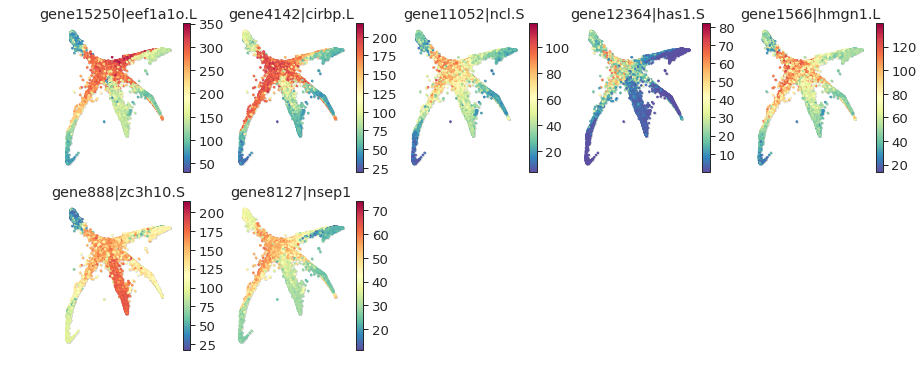

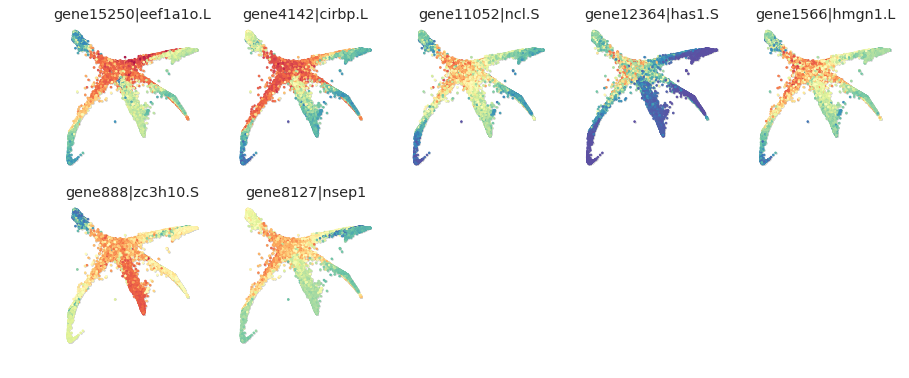

In [122]:
#Plot progenitor markers
plot_gene_expression(imp_df, spring, ['gene15250|eef1a1o.L', 'gene4142|cirbp.L', 'gene11052|ncl.S',
                                                   'gene12364|has1.S', 'gene1566|hmgn1.L', 'gene888|zc3h10.S', 'gene8127|nsep1'], plot_scale=True)
plt.savefig('./intermediate_files/Figures/marker_genes_progenitor_Scale.pdf'.format(g),dpi = 500 )

plot_gene_expression(imp_df, spring, ['gene15250|eef1a1o.L', 'gene4142|cirbp.L', 'gene11052|ncl.S',
                                                   'gene12364|has1.S', 'gene1566|hmgn1.L', 'gene888|zc3h10.S', 'gene8127|nsep1'], plot_scale=False)
plt.savefig('./intermediate_files/Figures/marker_genes_progenitor_NoScale.pdf'.format(g),dpi = 500 )


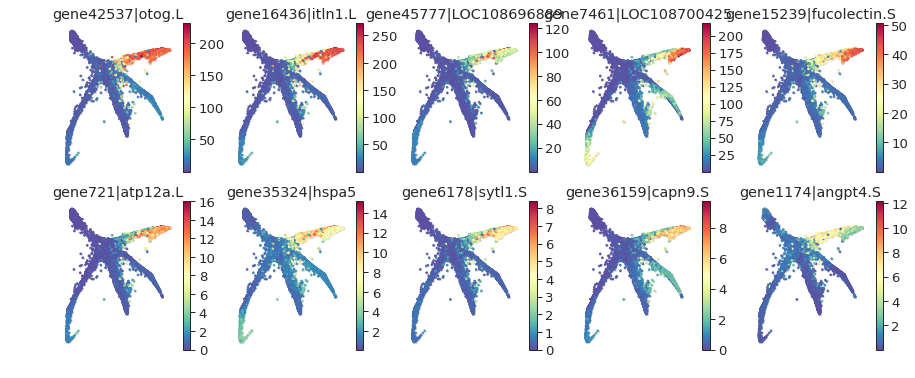

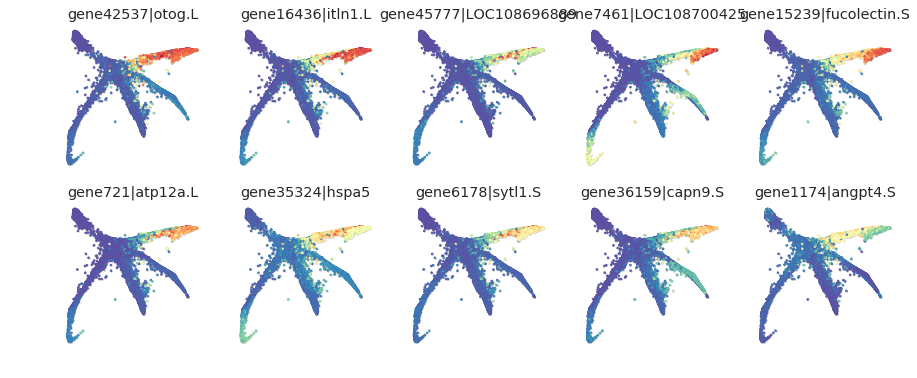

In [123]:
#Plot goblet markers
plot_gene_expression(imp_df, spring, ['gene42537|otog.L', 'gene16436|itln1.L', 'gene45777|LOC108696889',
                                                   'gene7461|LOC108700425', 'gene15239|fucolectin.S', 'gene721|atp12a.L',
                                                   'gene35324|hspa5', 'gene6178|sytl1.S', 'gene36159|capn9.S', 'gene1174|angpt4.S'], plot_scale=True)
plt.savefig('./intermediate_files/Figures/marker_genes_Goblet_Scale.pdf'.format(g),dpi = 500 )

plot_gene_expression(imp_df, spring, ['gene42537|otog.L', 'gene16436|itln1.L', 'gene45777|LOC108696889',
                                                   'gene7461|LOC108700425', 'gene15239|fucolectin.S', 'gene721|atp12a.L',
                                                   'gene35324|hspa5', 'gene6178|sytl1.S', 'gene36159|capn9.S', 'gene1174|angpt4.S'], plot_scale=False)
plt.savefig('./intermediate_files/Figures/marker_genes_Goblet_NoScale.pdf'.format(g),dpi = 500 )



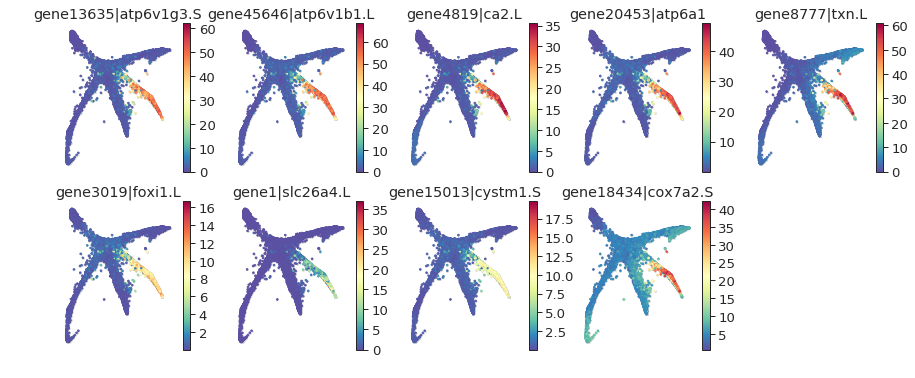

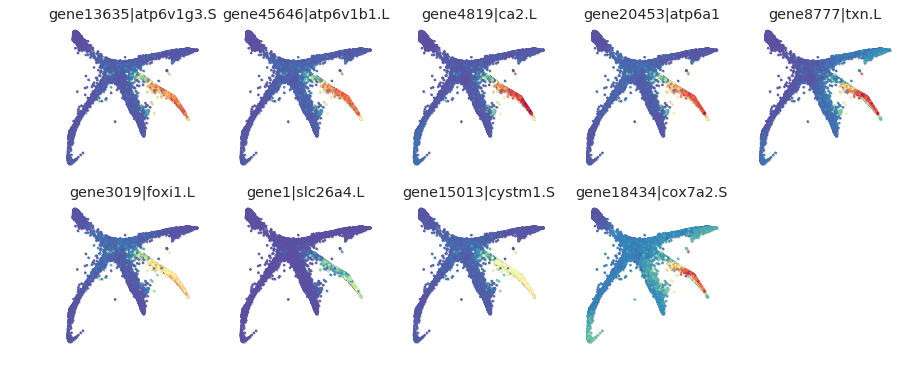

In [124]:
#Plot ionocyte markers
plot_gene_expression(imp_df, spring, ['gene13635|atp6v1g3.S', 'gene45646|atp6v1b1.L', 'gene4819|ca2.L', 
                                                    'gene20453|atp6a1', 'gene8777|txn.L', 'gene3019|foxi1.L', 'gene1|slc26a4.L',
                                                   'gene15013|cystm1.S', 'gene18434|cox7a2.S'], plot_scale=True)
plt.savefig('./intermediate_files/Figures/marker_genes_Ionocyte_Scale.pdf'.format(g),dpi = 500 )


plot_gene_expression(imp_df, spring, ['gene13635|atp6v1g3.S', 'gene45646|atp6v1b1.L', 'gene4819|ca2.L', 
                                                    'gene20453|atp6a1', 'gene8777|txn.L', 'gene3019|foxi1.L', 'gene1|slc26a4.L',
                                                   'gene15013|cystm1.S', 'gene18434|cox7a2.S'], plot_scale=False)
plt.savefig('./intermediate_files/Figures/marker_genes_Ionocyte_NoScale.pdf'.format(g),dpi = 500 )

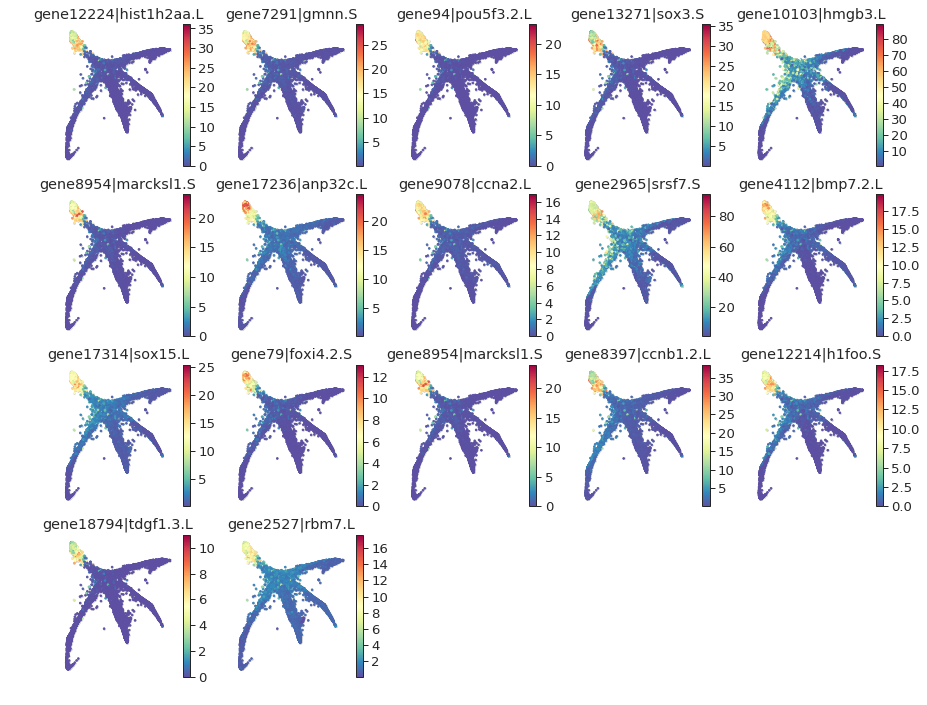

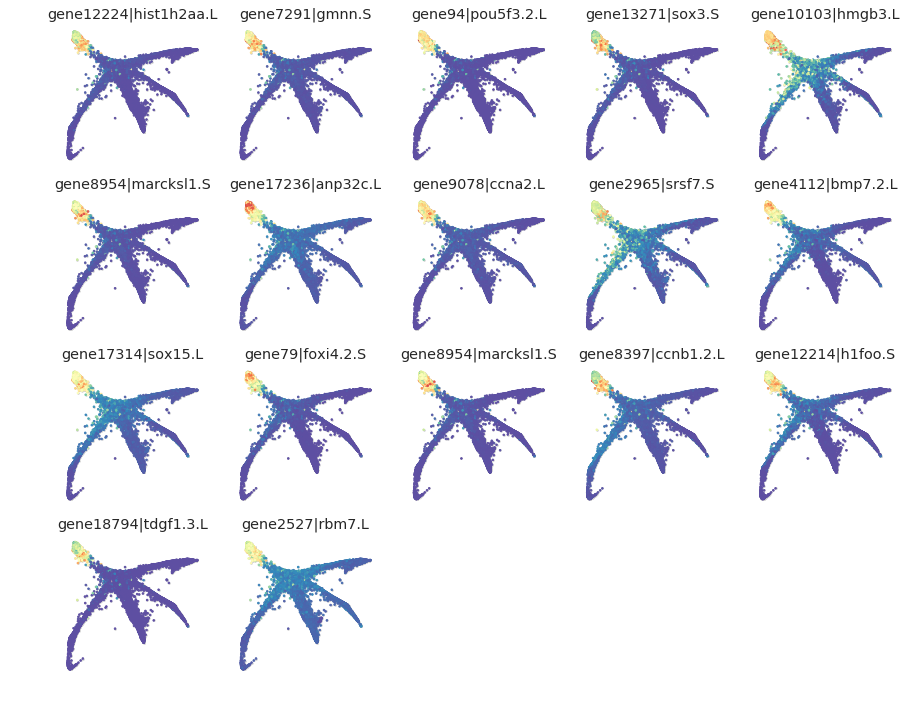

In [125]:
#Plot pluripotent markers
plot_gene_expression(imp_df, spring, ['gene12224|hist1h2aa.L', 'gene7291|gmnn.S', 'gene94|pou5f3.2.L', 'gene13271|sox3.S', 'gene10103|hmgb3.L', 
                                                   'gene8954|marcksl1.S', 'gene17236|anp32c.L', 'gene9078|ccna2.L', 'gene2965|srsf7.S', 'gene4112|bmp7.2.L',
                                                    'gene17314|sox15.L', 'gene79|foxi4.2.S', 'gene8954|marcksl1.S', 'gene8397|ccnb1.2.L', 'gene12214|h1foo.S', 'gene18794|tdgf1.3.L', 
                                                   'gene2527|rbm7.L'], plot_scale=True)
plt.savefig('./intermediate_files/Figures/marker_genes_Pluripotent_Scale.pdf'.format(g),dpi = 500 )

plot_gene_expression(imp_df, spring, ['gene12224|hist1h2aa.L', 'gene7291|gmnn.S', 'gene94|pou5f3.2.L', 'gene13271|sox3.S', 'gene10103|hmgb3.L', 
                                                   'gene8954|marcksl1.S', 'gene17236|anp32c.L', 'gene9078|ccna2.L', 'gene2965|srsf7.S', 'gene4112|bmp7.2.L',
                                                    'gene17314|sox15.L', 'gene79|foxi4.2.S', 'gene8954|marcksl1.S', 'gene8397|ccnb1.2.L', 'gene12214|h1foo.S', 'gene18794|tdgf1.3.L', 
                                                   'gene2527|rbm7.L'], plot_scale=False)
plt.savefig('./intermediate_files/Figures/marker_genes_Pluripotent_NoScale.pdf'.format(g),dpi = 500 )

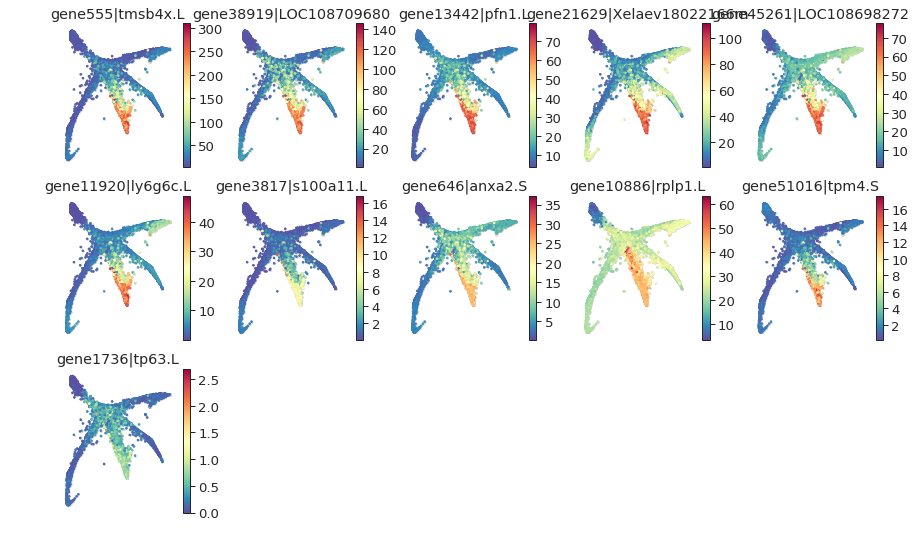

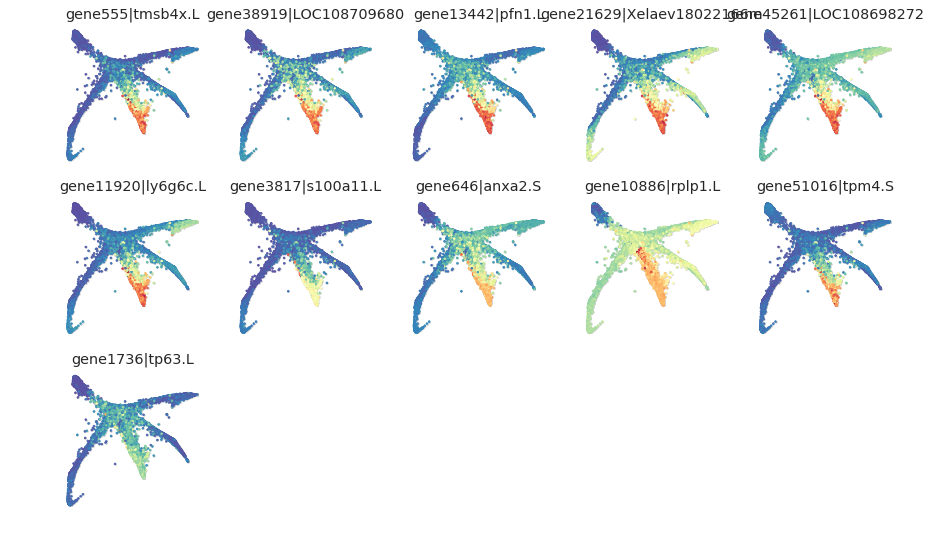

In [126]:
#Plot basal cell markers

plot_gene_expression(imp_df, spring, ['gene555|tmsb4x.L', 'gene38919|LOC108709680', 'gene13442|pfn1.L', 'gene21629|Xelaev18022166m', 
                                                   'gene45261|LOC108698272','gene11920|ly6g6c.L', 'gene3817|s100a11.L', 'gene646|anxa2.S', 'gene10886|rplp1.L', 'gene51016|tpm4.S',
                                                    'gene1736|tp63.L',
                                                   ], plot_scale=True)
plt.savefig('./intermediate_files/Figures/marker_genes_Stem_Scale.pdf'.format(g),dpi = 500 )

plot_gene_expression(imp_df, spring, ['gene555|tmsb4x.L', 'gene38919|LOC108709680', 'gene13442|pfn1.L', 'gene21629|Xelaev18022166m', 
                                                   'gene45261|LOC108698272','gene11920|ly6g6c.L', 'gene3817|s100a11.L', 'gene646|anxa2.S', 'gene10886|rplp1.L', 'gene51016|tpm4.S',
                                                    'gene1736|tp63.L',
                                                   ], plot_scale=False)
plt.savefig('./intermediate_files/Figures/marker_genes_Stem_NoScale.pdf'.format(g),dpi = 500 )


In [25]:
#Load affinity matrix
with open('./intermediate_files/aug_aff', "rb") as f:
    aug_aff = pickle.load( f)

In [26]:
#Diffusion maps for palantir
dm_res = palantir.utils.run_diffusion_maps(aug_aff,n_components=20,
    knn=20)
ms_data = palantir.utils.determine_multiscale_space(dm_res)
ms_data.index = data_df.index

In [27]:
#Magic imputation
imp_df = palantir.utils.run_magic_imputation(norm_df, dm_res)

In [18]:
import pickle

with open('./intermediate_files/clusters', "rb") as f:
    clusters = pickle.load( f)

# Subclustering

In [15]:
def process_subsets(data, clusters,  clust_subset):
    clusters = clusters[clusters.isin(clust_subset)]
    sub = data.loc[clusters.index,:].copy()
    return sub, clusters

In [16]:
#, coordinates_path, genes

In [19]:
Stem_sub, stem_clust = process_subsets(counts, clusters, [14, 12, 6, 3])

mcc_sub, mcc_clust = process_subsets(counts, clusters, [9, 10, 13])

ion_sub, ion_clust = process_subsets(counts, clusters, [11])

goblet_sub, goblet_clust = process_subsets(counts, clusters, [8])


pluri_sub, pluri_clust = process_subsets(counts, clusters, [7, 4])


progen_sub, progen_clust = process_subsets(counts, clusters, [0, 2, 1, 5])

In [20]:
def prep_coord(path, row_names):
    spring = pd.read_csv(path, header = None, index_col = 0)
    spring.columns = ['x', 'y']
    spring.index = row_names
    return spring
    
Stem_coord = prep_coord('./Subcluster_coordinates/Stem_coordinates.txt', Stem_sub.index)

mcc_coord = prep_coord('./Subcluster_coordinates/MCC_coordinates.txt', mcc_sub.index)

ion_coord = prep_coord('./Subcluster_coordinates/Ion_coordinates.txt', ion_sub.index)

goblet_coord = prep_coord('./Subcluster_coordinates/Goblet_coordinates.txt', goblet_sub.index)

pluri_coord = prep_coord('./Subcluster_coordinates/Pluri_coordinates.txt', pluri_sub.index)

progen_coord = prep_coord('./Subcluster_coordinates/Progen_coordinates.txt', progen_sub.index)

stem_projected_coord = prep_coord('./Subcluster_coordinates/stem_projected.txt', Stem_sub.index)

goblet_projected_coord = prep_coord('./Subcluster_coordinates/goblet_projected.txt', goblet_sub.index)




In [26]:
from IntegratedAnalysis import plot_gene_expression

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


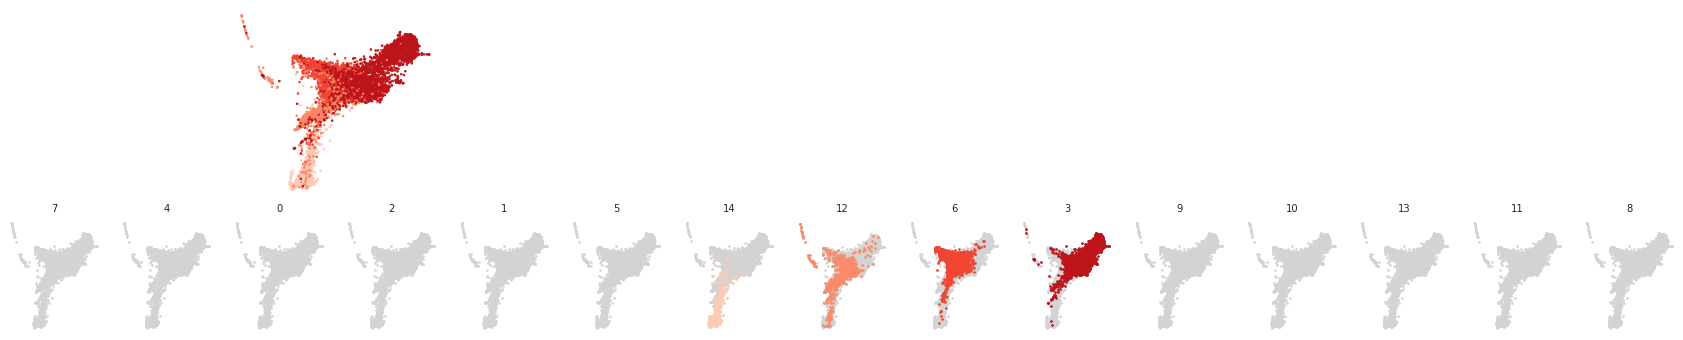

In [26]:
plot_cell_clusters(stem_projected_coord, stem_clust, cluster_colors=colors.color, cluster_order=colors.sort_values('clust_order').org_clust)
plt.savefig('./intermediate_files/Figures/stem_subset_clusters.pdf',dpi = 500 )

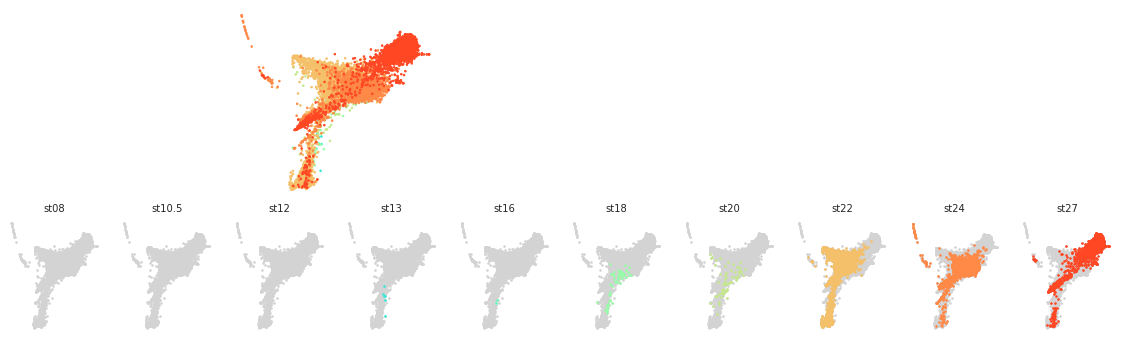

In [28]:
cluster_colors = pd.Series(sns.color_palette(
            'rainbow', 10), index=['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])

plot_cell_clusters(stem_projected_coord, tp.loc[Stem_coord.index], cluster_colors=cluster_colors, cluster_order = ['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])
plt.savefig('./intermediate_files/Figures/Stem_subset_stages.pdf',dpi = 500 )

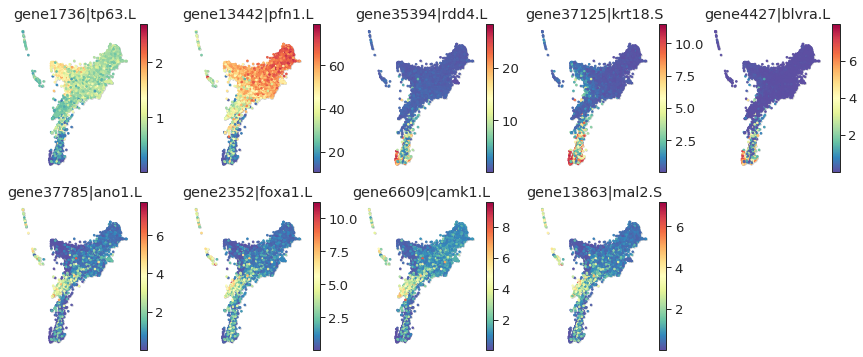

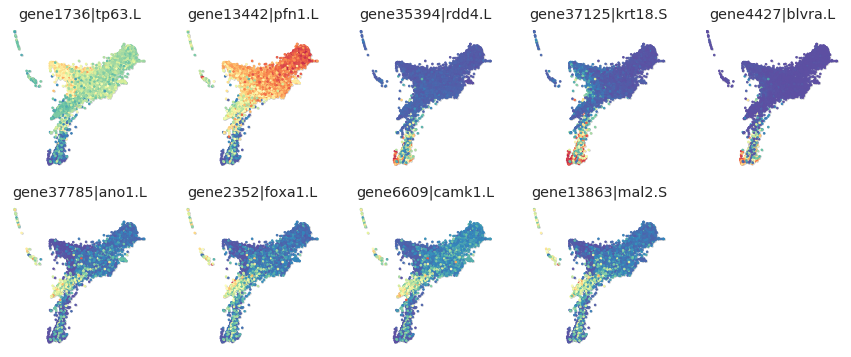

In [32]:
plot_gene_expression(imp_df, stem_projected_coord, 
                                       [
                                       'gene1736|tp63.L', 'gene13442|pfn1.L', 'gene35394|rdd4.L' ,'gene37125|krt18.S', 'gene4427|blvra.L', 
                                        'gene37785|ano1.L','gene2352|foxa1.L','gene6609|camk1.L', 'gene13863|mal2.S'],
                                       plot_scale=True)
plt.savefig('./intermediate_files/Figures/stem_and_SCC_subset_DE_genes_Scale.pdf',dpi = 500 )
plot_gene_expression(imp_df, stem_projected_coord, [
                                       'gene1736|tp63.L', 'gene13442|pfn1.L', 'gene35394|rdd4.L' ,'gene37125|krt18.S', 'gene4427|blvra.L', 
                                        'gene37785|ano1.L','gene2352|foxa1.L','gene6609|camk1.L', 'gene13863|mal2.S'],
                                       plot_scale=False)
plt.savefig('./intermediate_files/Figures/stem_and_SCC_subset_DE_genes_NoScale.pdf',dpi = 500 )

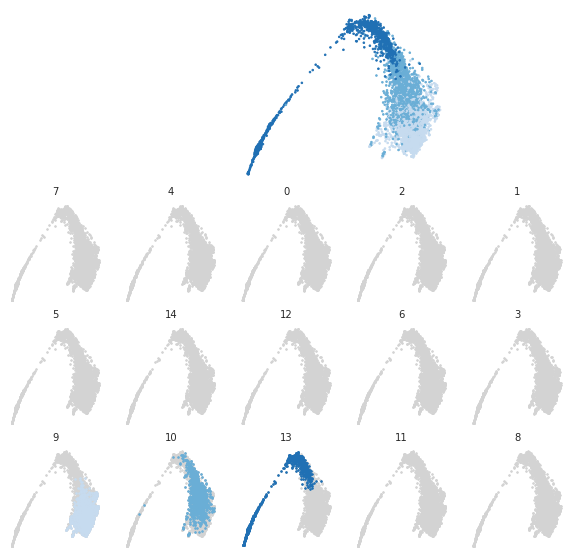

In [47]:
plot_cell_clusters(mcc_coord, mcc_clust, cluster_colors=colors.color, cluster_order=colors.sort_values('clust_order').org_clust)
plt.savefig('./intermediate_files/Figures/MCC_subset_clusters.pdf',dpi = 500 )

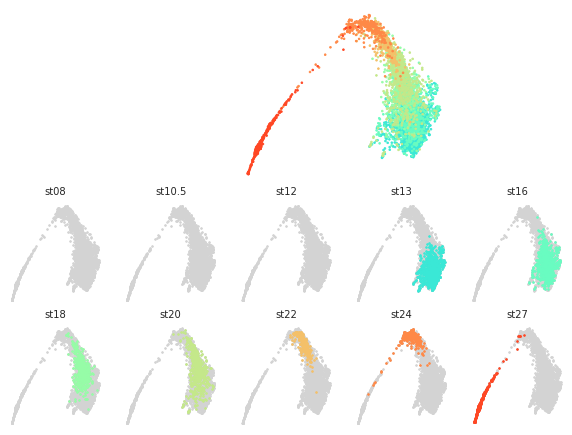

In [66]:
cluster_colors = pd.Series(sns.color_palette(
            'rainbow', 10), index=['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])

plot_cell_clusters(mcc_coord, tp.loc[mcc_coord.index], cluster_colors=cluster_colors, cluster_order = ['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])
plt.savefig('./intermediate_files/Figures/MCC_subset_stages.pdf',dpi = 500 )

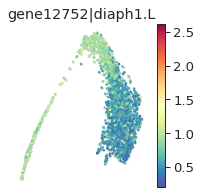

In [27]:
plot_gene_expression(imp_df, mcc_coord,['gene12752|diaph1.L'],
                                       plot_scale=True)
plt.savefig('imputed_diaph1_L_MCC.pdf')

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


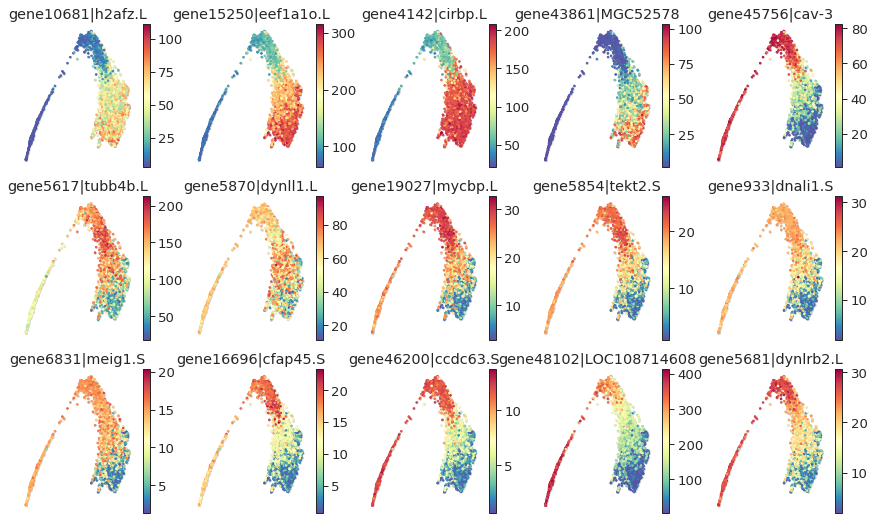

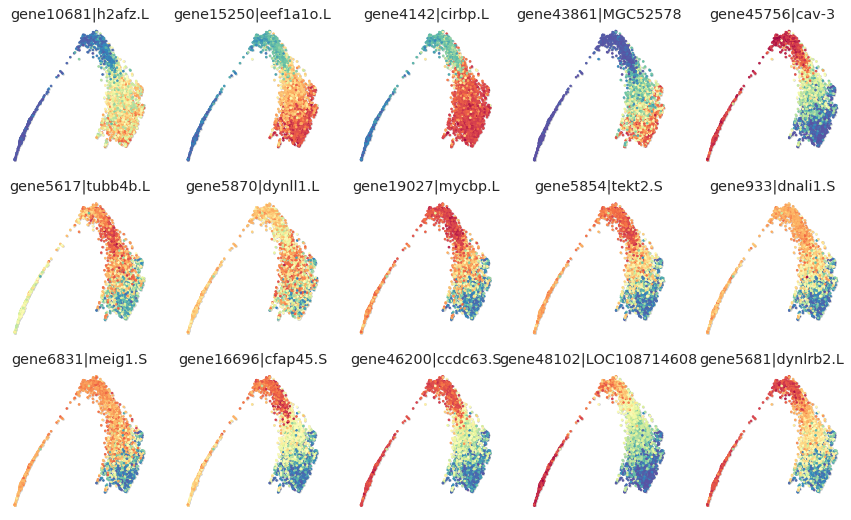

In [31]:
plot_gene_expression(imp_df, mcc_coord, 
                                       ['gene10681|h2afz.L','gene15250|eef1a1o.L', 'gene4142|cirbp.L', 'gene43861|MGC52578',
                                        'gene45756|cav-3', 'gene5617|tubb4b.L','gene5870|dynll1.L', 'gene19027|mycbp.L', 'gene5854|tekt2.S', 'gene933|dnali1.S', 'gene6831|meig1.S', 
                                                    'gene16696|cfap45.S', 'gene46200|ccdc63.S', 'gene48102|LOC108714608', 'gene5681|dynlrb2.L'],
                                       plot_scale=True)
plt.savefig('./intermediate_files/Figures/MCC_subset_DE_genes_Scale.pdf',dpi = 500 )
plot_gene_expression(imp_df, mcc_coord, 
                                        ['gene10681|h2afz.L','gene15250|eef1a1o.L', 'gene4142|cirbp.L', 'gene43861|MGC52578',
                                         'gene45756|cav-3', 'gene5617|tubb4b.L','gene5870|dynll1.L', 'gene19027|mycbp.L', 'gene5854|tekt2.S', 'gene933|dnali1.S', 'gene6831|meig1.S', 
                                                    'gene16696|cfap45.S', 'gene46200|ccdc63.S', 'gene48102|LOC108714608', 'gene5681|dynlrb2.L'],
                                       plot_scale=False)
plt.savefig('./intermediate_files/Figures/MCC_subset_DE_genes_NoScale.pdf',dpi = 500 )

In [51]:
import warnings
import os
import numpy as np
import pandas as pd
from itertools import chain
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde
import palantir
import matplotlib.pyplot as plt

import matplotlib
from matplotlib import font_manager



def plot_cell_clusters(tsne, clusters, cluster_colors, cluster_order):
    """Plot cell clusters on the tSNE map
    :param tsne: tSNE map
    :param clusters: Results of the determine_cell_clusters function
    
    #Modified palantir method!
    """

    # Cluster number of clusters
    n_clusters = len(clusters.unique())

    # Set up figure
    n_cols = 20
    n_rows = int(np.ceil(n_clusters / n_cols))
    fig = plt.figure(figsize=[2 * n_cols, 2 * (n_rows + 2)])
    gs = plt.GridSpec(n_rows + 2, n_cols,
                      height_ratios=np.append([0.75, 0.75], np.repeat(1, n_rows)))

    # Clusters
    ax = plt.subplot(gs[0:2, 2:4])
    ax.scatter(tsne['x'], tsne['y'], s=3,
               c=cluster_colors[clusters[tsne.index]])
    ax.set_axis_off()
    ax.set_rasterized(True)

    # Branch probabilities
    for i, cluster in enumerate(cluster_order):
        row = int(np.floor(i / n_cols))
        ax = plt.subplot(gs[row + 2, i % n_cols])
        ax.scatter(tsne.loc[:, 'x'], tsne.loc[:, 'y'], s=3, color='lightgrey')
        cells = clusters.index[clusters == cluster]
        ax.scatter(tsne.loc[cells, 'x'], tsne.loc[cells, 'y'],
                   s=3, color=cluster_colors[cluster])
        ax.set_axis_off()
        ax.set_title(cluster, fontsize=10)
        ax.set_rasterized(True)

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


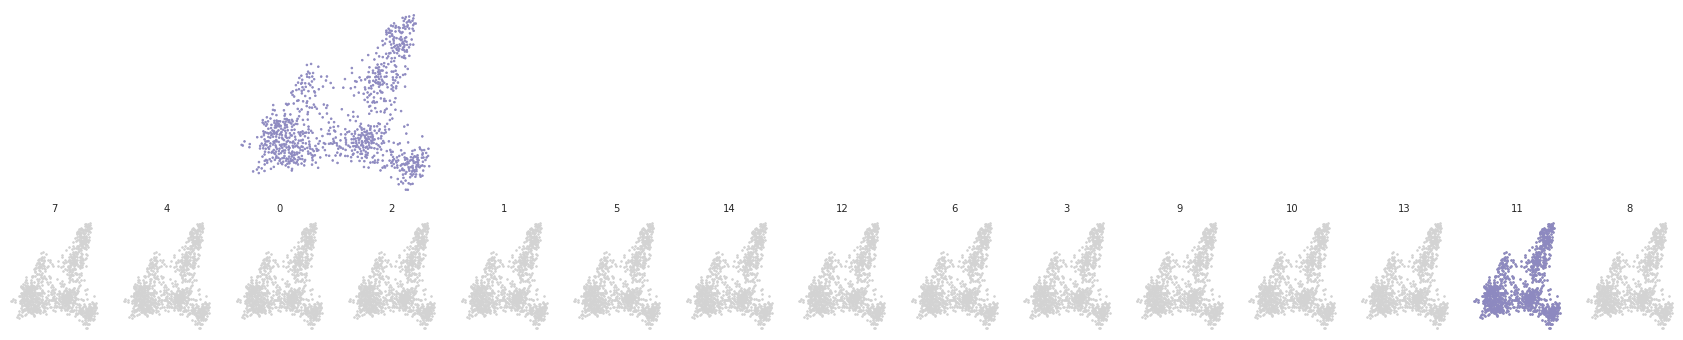

In [40]:
plot_cell_clusters(ion_coord, ion_clust, cluster_colors=colors.color, cluster_order=colors.sort_values('clust_order').org_clust)
#plt.savefig('./intermediate_files/Figures/ion_subset_clusters.pdf',dpi = 500 )

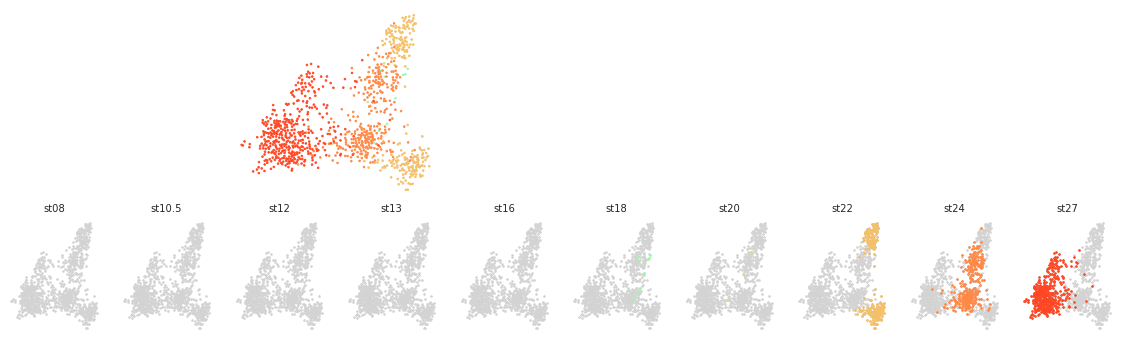

In [41]:
cluster_colors = pd.Series(sns.color_palette(
            'rainbow', 10), index=['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])

plot_cell_clusters(ion_coord, tp.loc[ion_coord.index], cluster_colors=cluster_colors, cluster_order = ['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])
#plt.savefig('./intermediate_files/Figures/ion_subset_stages.pdf',dpi = 500 )

In [30]:
#Search by gene id
def find(gene):
    return list(imp_df.columns[imp_df.columns.str.match(r'^(gene[0-9]+\|){}'.format(gene))])

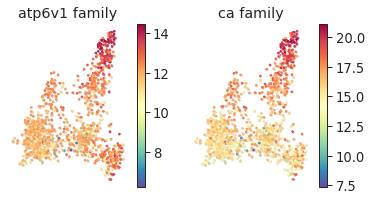

In [37]:
plot_gene_expression(score, ion_coord, score.columns[:2], plot_scale=True)
#plt.savefig('202100319_figures/family_mean_expression_spring_ionocytes.pdf', dpi = 1000)

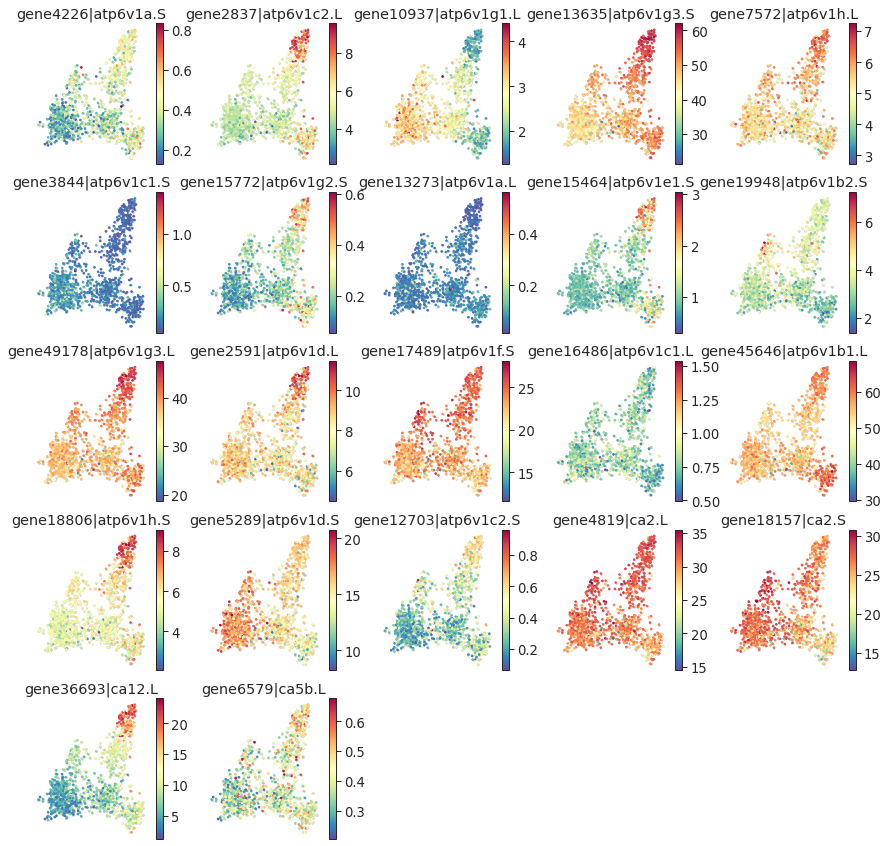

In [36]:
plot_gene_expression(imp_df, ion_coord, genes, plot_scale=True)
plt.savefig('202100319_figures/ion_subset_ca_atp6v.pdf',dpi = 500 )

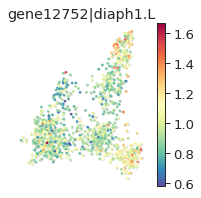

In [26]:
plot_gene_expression(imp_df, ion_coord,['gene12752|diaph1.L'],
                                       plot_scale=True)
plt.savefig('imputed_diaph1_L_ionocytes.pdf')

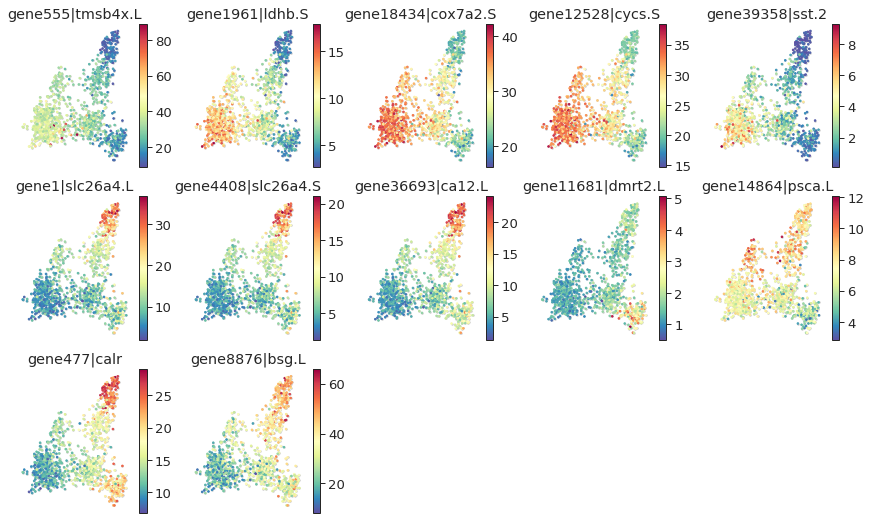

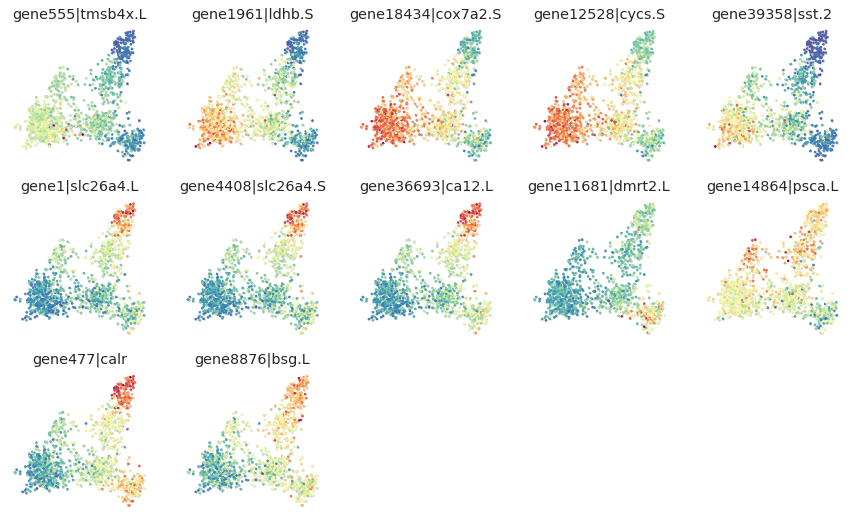

In [71]:
plot_gene_expression(imp_df, ion_coord, 
                                       ['gene555|tmsb4x.L', 'gene1961|ldhb.S', 'gene18434|cox7a2.S', 'gene12528|cycs.S','gene39358|sst.2',
                                        'gene1|slc26a4.L', 'gene4408|slc26a4.S', 'gene36693|ca12.L', 
                                        
                                        'gene11681|dmrt2.L', 'gene14864|psca.L', 'gene477|calr', 'gene8876|bsg.L'],
                                       plot_scale=True)
plt.savefig('./intermediate_files/Figures/ion_subset_DE_genes_Scale.pdf',dpi = 500 )
plot_gene_expression(imp_df, ion_coord,  ['gene555|tmsb4x.L', 'gene1961|ldhb.S', 'gene18434|cox7a2.S', 'gene12528|cycs.S','gene39358|sst.2',
                                        'gene1|slc26a4.L', 'gene4408|slc26a4.S', 'gene36693|ca12.L', 
                                        
                                        'gene11681|dmrt2.L', 'gene14864|psca.L', 'gene477|calr', 'gene8876|bsg.L'],
                                       plot_scale=False)
plt.savefig('./intermediate_files/Figures/ion_subset_DE_genes_NoScale.pdf',dpi = 500 )

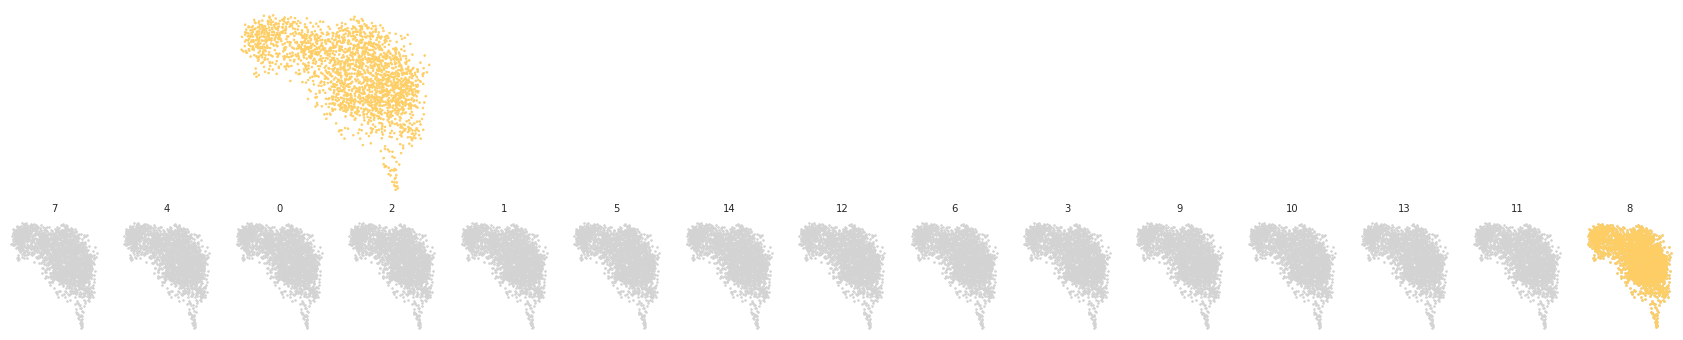

In [35]:
plot_cell_clusters(goblet_projected_coord, goblet_clust, cluster_colors=colors.color, cluster_order=colors.sort_values('clust_order').org_clust)
plt.savefig('./intermediate_files/Figures/goblet_subset_clusters.pdf',dpi = 500 )

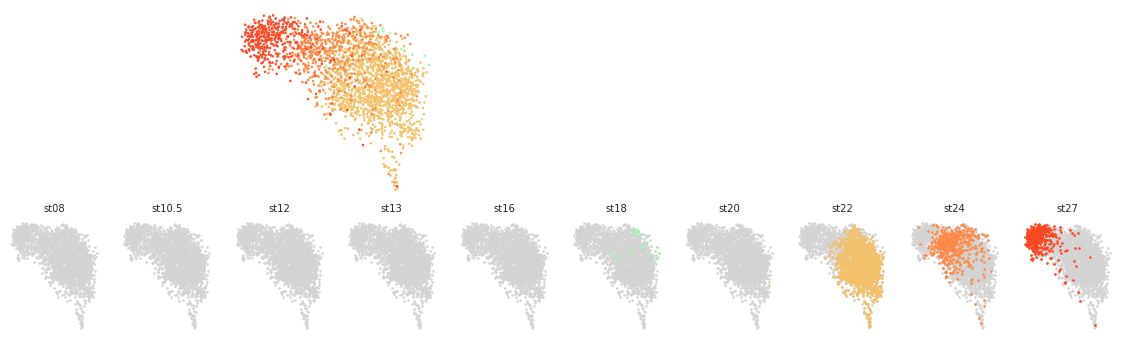

In [36]:
cluster_colors = pd.Series(sns.color_palette(
            'rainbow', 10), index=['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])

plot_cell_clusters(goblet_projected_coord, tp.loc[goblet_coord.index], cluster_colors=cluster_colors, cluster_order = ['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])
plt.savefig('./intermediate_files/Figures/goblet_subset_stages.pdf',dpi = 500 )

The following genes were either not observed in the experiment, or the wrong gene symbol was used: {''}
The following genes were either not observed in the experiment, or the wrong gene symbol was used: {''}


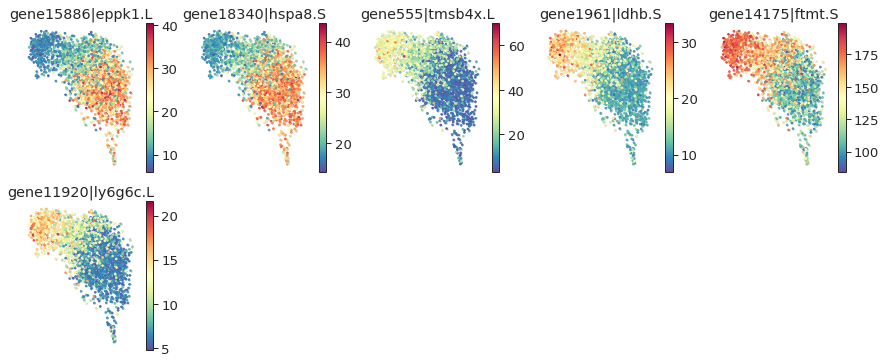

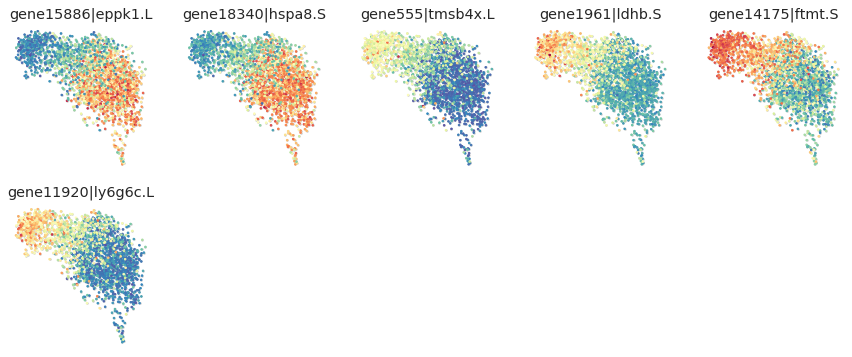

In [37]:
plot_gene_expression(imp_df, goblet_projected_coord,  ['gene15886|eppk1.L', 'gene18340|hspa8.S', 'gene555|tmsb4x.L', 'gene1961|ldhb.S', 'gene14175|ftmt.S', 'gene11920|ly6g6c.L', 
                                             ''],
                                       plot_scale=True)
plt.savefig('./intermediate_files/Figures/goblet_subset_DE_genes_Scale.pdf',dpi = 500 )

plot_gene_expression(imp_df, goblet_projected_coord,  ['gene15886|eppk1.L', 'gene18340|hspa8.S', 'gene555|tmsb4x.L', 'gene1961|ldhb.S', 'gene14175|ftmt.S', 'gene11920|ly6g6c.L', 
                                             ''],
                                       plot_scale=False)
plt.savefig('./intermediate_files/Figures/goblet_subset_DE_genes_NoScale.pdf',dpi = 500 )

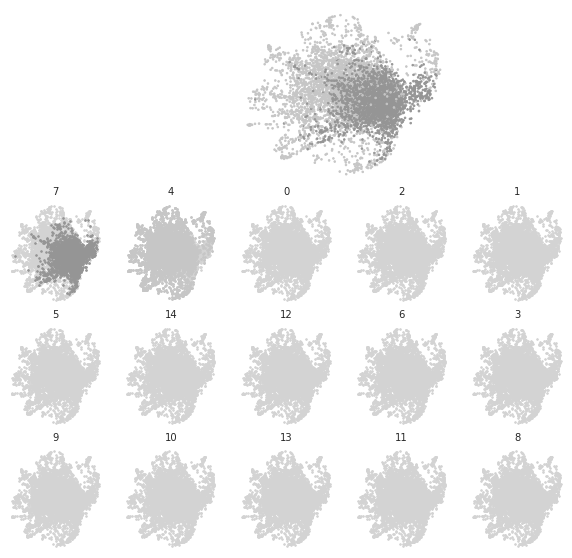

In [31]:
plot_cell_clusters(pluri_coord, pluri_clust, cluster_colors=colors.color, cluster_order=colors.sort_values('clust_order').org_clust)
plt.savefig('./intermediate_files/Figures/pluri_subset_clusters.pdf',dpi = 500 )

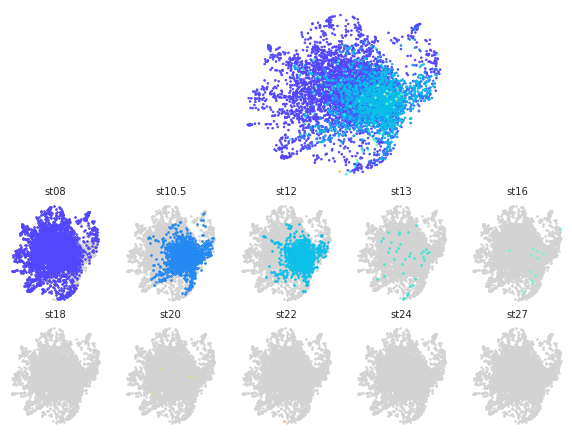

In [33]:
cluster_colors = pd.Series(sns.color_palette(
            'rainbow', 10), index=['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])

plot_cell_clusters(pluri_coord, tp.loc[pluri_coord.index], cluster_colors=cluster_colors, cluster_order = ['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])
plt.savefig('./intermediate_files/Figures/pluri_subset_stages.pdf',dpi = 500 )

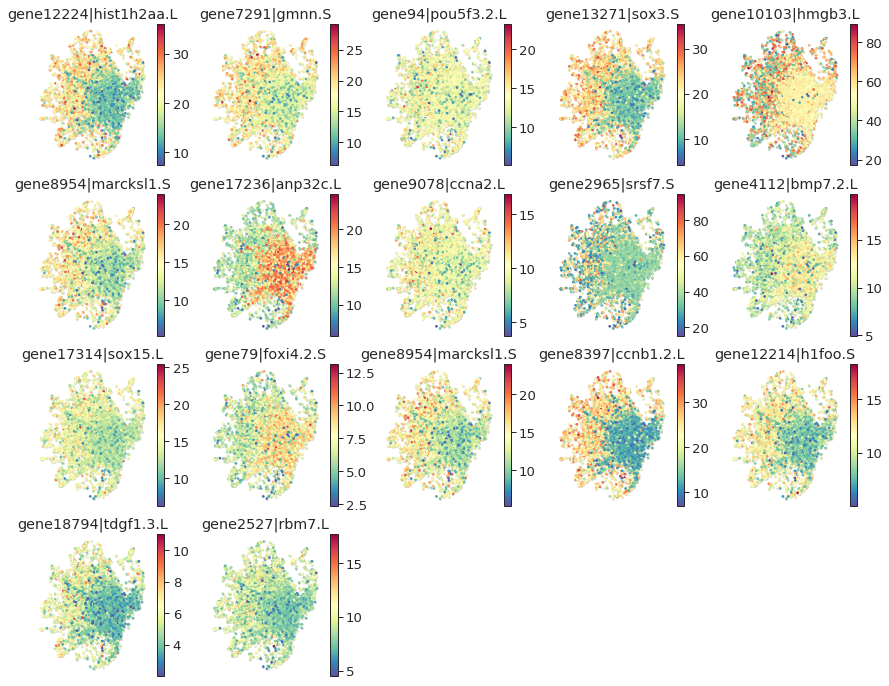

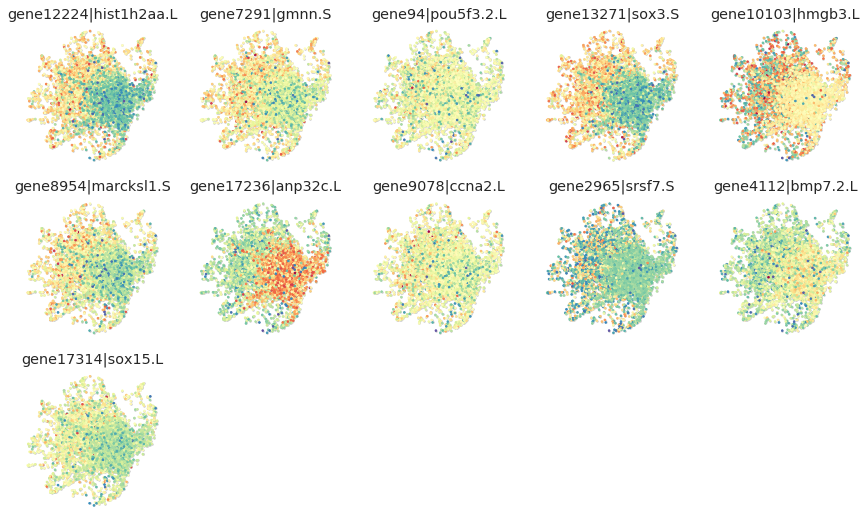

In [47]:
plot_gene_expression(imp_df, pluri_coord, 
                                       ['gene12224|hist1h2aa.L', 'gene7291|gmnn.S', 'gene94|pou5f3.2.L', 'gene13271|sox3.S', 'gene10103|hmgb3.L', 
                                                   'gene8954|marcksl1.S', 'gene17236|anp32c.L', 'gene9078|ccna2.L', 'gene2965|srsf7.S', 'gene4112|bmp7.2.L',
                                                    'gene17314|sox15.L', 'gene79|foxi4.2.S', 'gene8954|marcksl1.S', 'gene8397|ccnb1.2.L', 'gene12214|h1foo.S', 'gene18794|tdgf1.3.L', 
                                                   'gene2527|rbm7.L'],
                                       plot_scale=True)
plt.savefig('./intermediate_files/Figures/pluri_subset_DE_genes_Scale.pdf',dpi = 500 )
plot_gene_expression(imp_df, pluri_coord,  ['gene12224|hist1h2aa.L', 'gene7291|gmnn.S', 'gene94|pou5f3.2.L', 'gene13271|sox3.S', 'gene10103|hmgb3.L', 
                                                   'gene8954|marcksl1.S', 'gene17236|anp32c.L', 'gene9078|ccna2.L', 'gene2965|srsf7.S', 'gene4112|bmp7.2.L',
                                                    'gene17314|sox15.L'],
                                       plot_scale=False)
plt.savefig('./intermediate_files/Figures/pluri_subset_DE_genes_NoScale.pdf',dpi = 500 )

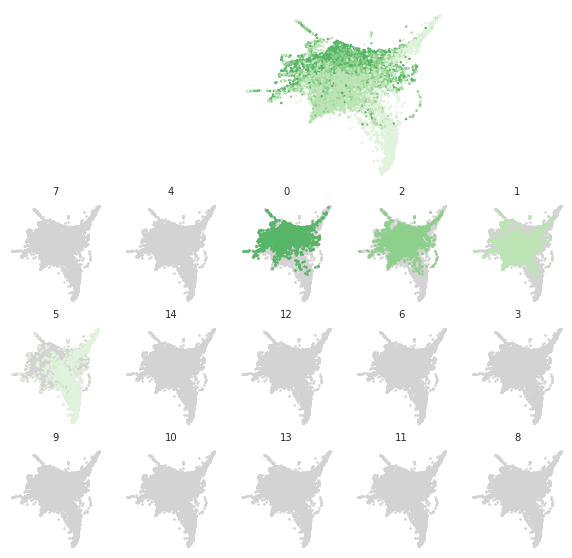

In [39]:
plot_cell_clusters(progen_coord, progen_clust, cluster_colors=colors.color, cluster_order=colors.sort_values('clust_order').org_clust)
plt.savefig('./intermediate_files/Figures/progen_subset_clusters.pdf',dpi = 500 )

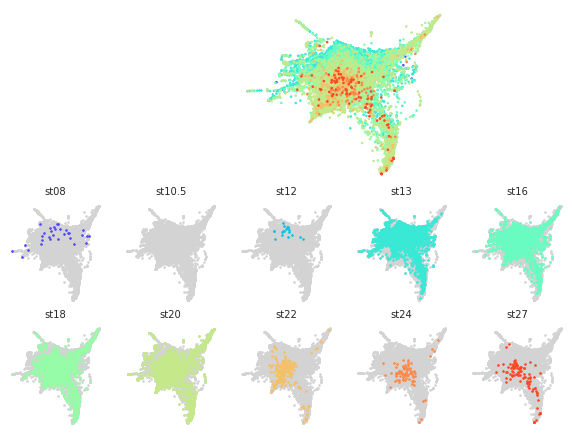

In [40]:
cluster_colors = pd.Series(sns.color_palette(
            'rainbow', 10), index=['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])

plot_cell_clusters(progen_coord, tp.loc[progen_coord.index], cluster_colors=cluster_colors, cluster_order = ['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27'])
plt.savefig('./intermediate_files/Figures/progen_subset_stages.pdf',dpi = 500 )

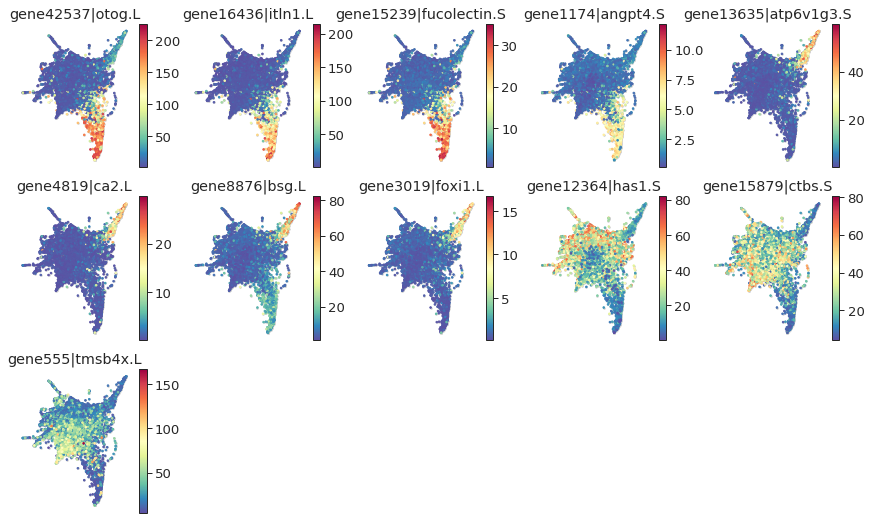

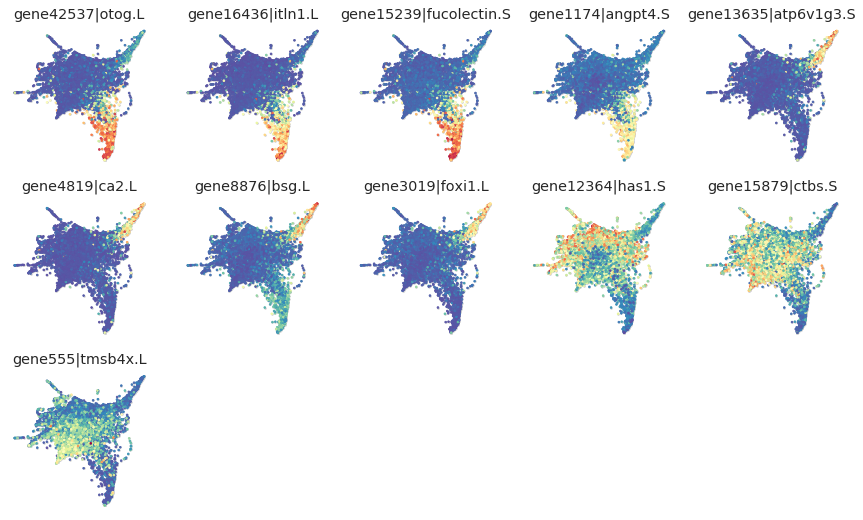

In [44]:
plot_gene_expression(imp_df, progen_coord, 
                                       ['gene42537|otog.L', 'gene16436|itln1.L', 'gene15239|fucolectin.S', 'gene1174|angpt4.S',
                                       'gene13635|atp6v1g3.S', 'gene4819|ca2.L', 'gene8876|bsg.L', 'gene3019|foxi1.L', 
                                       'gene12364|has1.S', 'gene15879|ctbs.S', 'gene555|tmsb4x.L'],
                                       plot_scale=True)
plt.savefig('./intermediate_files/Figures/progen_subset_DE_genes_Scale.pdf',dpi = 500 )
plot_gene_expression(imp_df, progen_coord,  ['gene42537|otog.L', 'gene16436|itln1.L', 'gene15239|fucolectin.S', 'gene1174|angpt4.S',
                                       'gene13635|atp6v1g3.S', 'gene4819|ca2.L', 'gene8876|bsg.L', 'gene3019|foxi1.L', 
                                       'gene12364|has1.S', 'gene15879|ctbs.S', 'gene555|tmsb4x.L'],
                                       plot_scale=False)
plt.savefig('./intermediate_files/Figures/progen_subset_DE_genes_NoScale.pdf',dpi = 500 )